# **EDA-Intermediate Colleges of Pakistan**


## Mounting *gdrive* into colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
data=pd.read_csv('/content/drive/MyDrive/Internship/CodexCue/Project 1/All the Intermediate Colleges in Pakistan.csv')
data.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


## Data cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [ ]:
data.describe()


,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Riphah International College Dargai,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


In [ ]:
#converting rating to numeric datatype
data['Rating'] = data['Rating'].str.rstrip('*').astype(float)

In [ ]:

# Extract the city from the Location column for regional analysis
# Handle potential non-string values in the 'Location' column
data['City'] = data['Location'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else None)




## Performance Trends



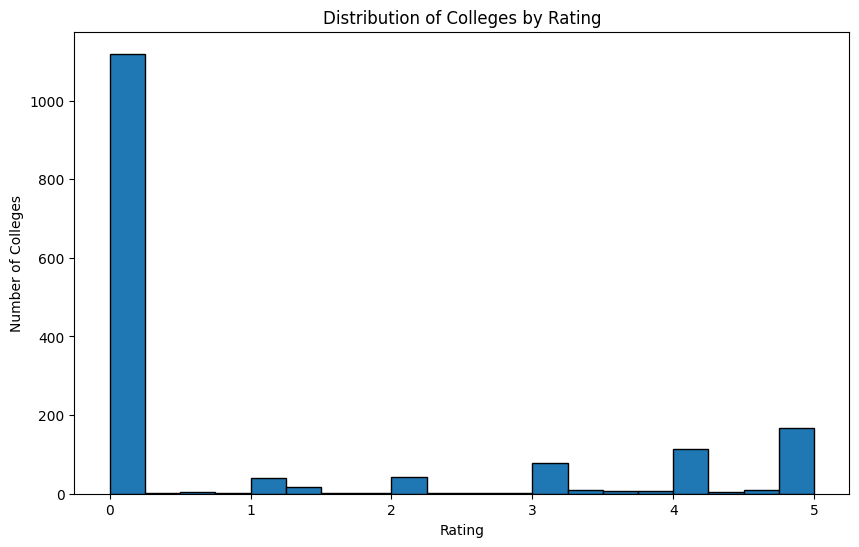

In [ ]:
#  Distribution of Colleges by Rating

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Colleges')
_ = plt.title('Distribution of Colleges by Rating')

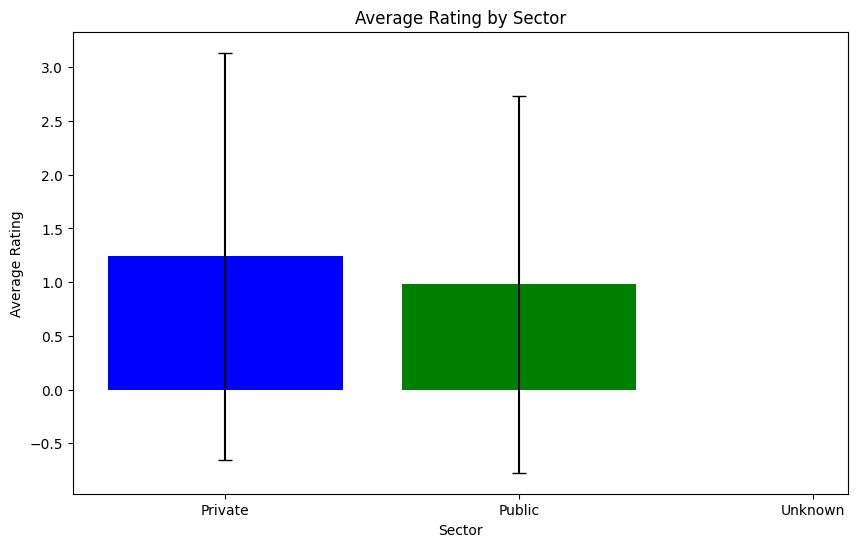

In [ ]:
plt.figure(figsize=(10, 6))
sectors = ['Private', 'Public', 'Unknown']
mean_ratings = [data[data['Sector'] == sector]['Rating'].mean() for sector in sectors]
std_ratings = [data[data['Sector'] == sector]['Rating'].std() for sector in sectors]
plt.bar(sectors, mean_ratings, yerr=std_ratings, capsize=5, color=['blue', 'green', 'orange'])
plt.xlabel('Sector')
plt.ylabel('Average Rating')
_ = plt.title('Average Rating by Sector')
plt.show()






In [ ]:
#most common study programs
data['Study Program'].value_counts()

Study Program
FA ICS Computer Science FSc Pre Medical FSc Pre Engineering ICom FA General Science    49
FA FSc Pre-Engineering FSc Pre-Medical FA General Science ICS ICom                     44
FA FSc Pre-Engineering FSc Pre-Medical ICS ICom FA General Science                     34
Fsc Pre Engineering FSc Pre Medical ICS ICOM FA                                        32
FA ICS Computer Science FSc Pre Medical FSc Pre Engineering ICom                       30
                                                                                       ..
FA ICS ICOM                                                                             1
Dcom Icom FA DBA DHO                                                                    1
ACCA ICMA  PCIMA CMCA CPCA ACMA                                                         1
FSc General Science Fsc Pre Engineering FSc Pre Medical FA ICom ICS                     1
FSc Pre Engineering ICS Computer Science FSc Pre Medical FA General Science Icom      

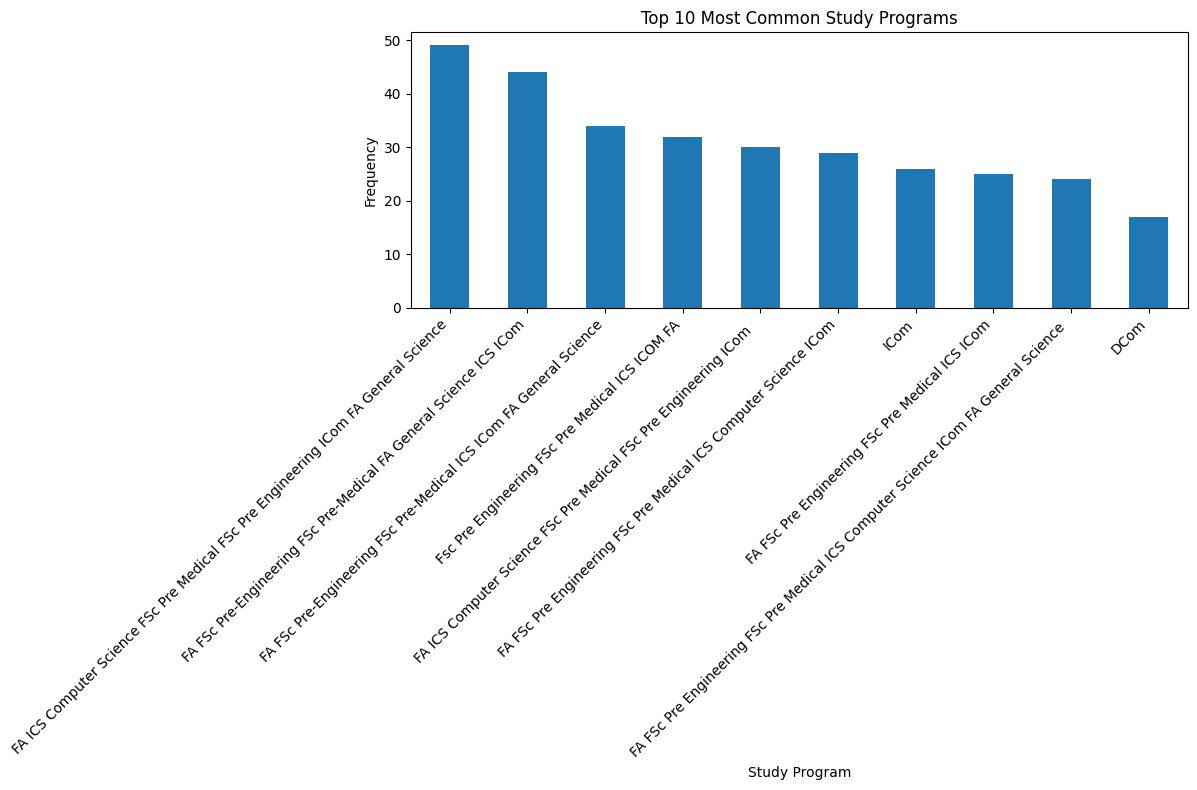

In [ ]:
#visuliazing
plt.figure(figsize=(12, 8))
study_programs_distribution = data['Study Program'].value_counts().head(10)
study_programs_distribution.plot(kind='bar')
plt.title('Top 10 Most Common Study Programs')
plt.xlabel('Study Program')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('study_programs_distribution.png')
plt.show()


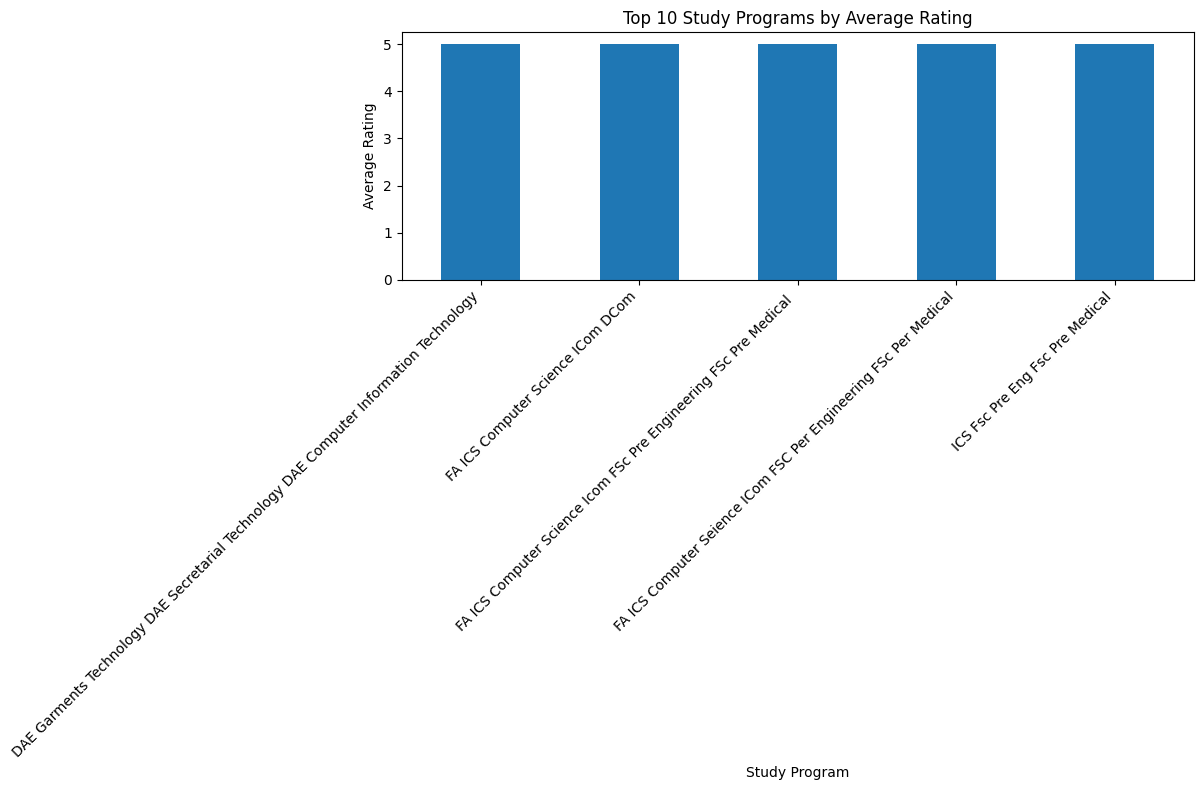

In [ ]:
#top 5 study programs by rating
plt.figure(figsize=(12, 8))
average_rating_by_program = data.groupby('Study Program')['Rating'].mean().sort_values(ascending=False).head(10)
average_rating_by_program.head(5).plot(kind='bar')
plt.title('Top 10 Study Programs by Average Rating')
plt.xlabel('Study Program')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('average_rating_by_program.png')
plt.show()

## Regional Disparites
Analyzing how ratings vary by geographic location

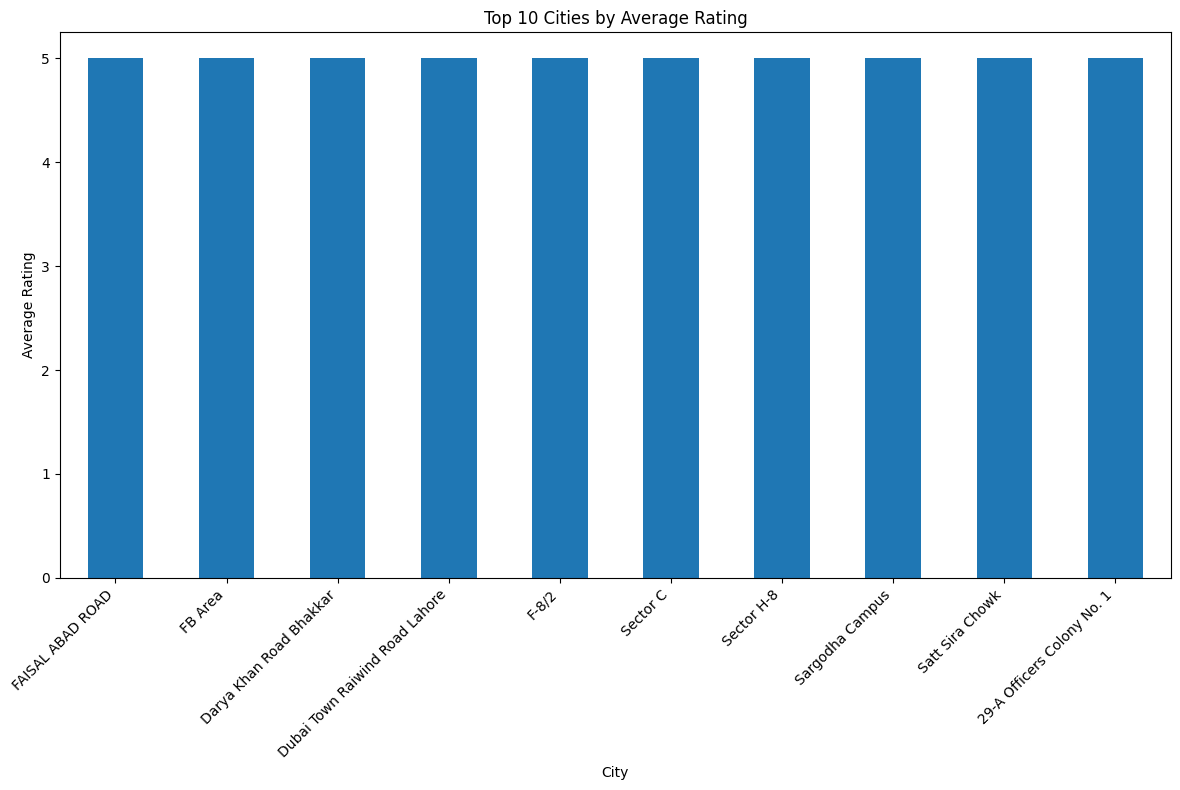

In [ ]:
# Plot 5: Top 10 Cities by Average Rating
plt.figure(figsize=(12, 8))

average_rating_by_city = data.groupby('City')['Rating'].mean().sort_values(ascending=False).head(10)
average_rating_by_city.plot(kind='bar')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('average_rating_by_city.png')
plt.show()

## Dissecting factors such as academic results, faculty quality, and resources,  highlighting areas needing improvement.

In [ ]:
#adding hypotheticall data to calculate the needs
data['Academic Results'] = np.random.randint(50, 101, size=len(data))
data['Faculty Quality'] = np.random.randint(1, 6, size=len(data))
data['Resources'] = np.random.randint(1, 6, size=len(data))

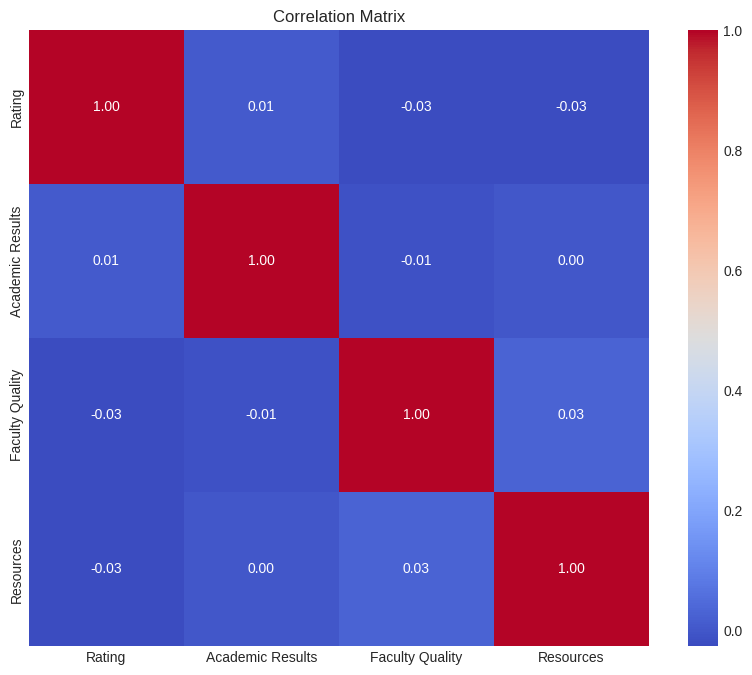

In [ ]:
# Plot 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Rating', 'Academic Results', 'Faculty Quality', 'Resources']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

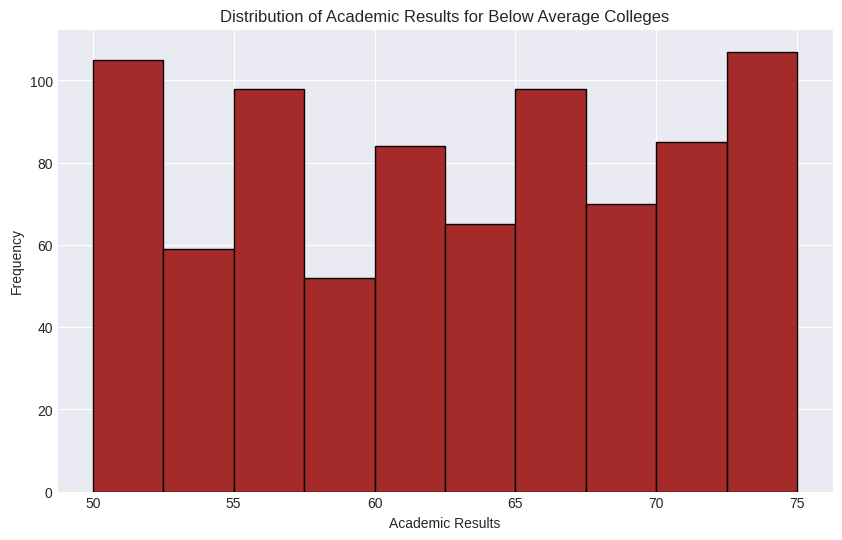

In [ ]:
# Plot 2: Distribution of Academic Results for Below Average Colleges
plt.figure(figsize=(10, 6))

below_avg_colleges = data[data['Academic Results'] < data['Academic Results'].mean()]
plt.hist(below_avg_colleges['Academic Results'], bins=10, edgecolor='black', color='brown')
plt.title('Distribution of Academic Results for Below Average Colleges')
plt.xlabel('Academic Results')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('academic_results_distribution.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

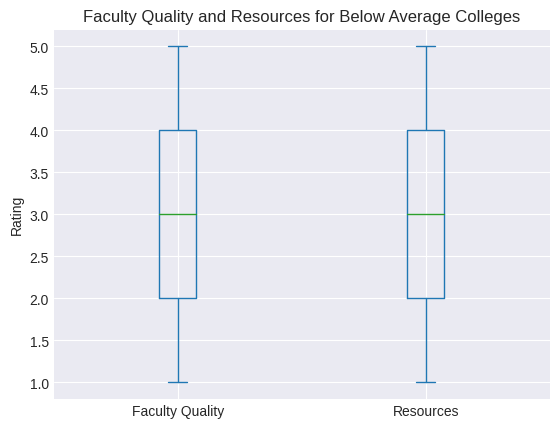

In [ ]:
# Plot:3  Faculty quality and resources
plt.figure(figsize=(10, 6))

below_avg_colleges[['Faculty Quality', 'Resources']].plot(kind='box')
plt.title('Faculty Quality and Resources for Below Average Colleges')
plt.ylabel('Rating')
plt.grid(True)
plt.show()